# Ford_gobike_part2
## by Mulukal A




## Investigation Overview


> The over all goals of the presentation are to show the following How long the trip takes When most trips are taken interms of 'Day of the week' Wheather the trip duration depends on the user type or not




## Dataset Overview

> The data consisted of duration_sec and attributes of approximately 183,412. The attributes included the five, as well as additional measurements such as start station name, user_type, and member_gender

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('201902A-fordgobike-tripdata.csv')



## How Long does the trip take?
> An average ride duration lies on 600 sec (10 min)



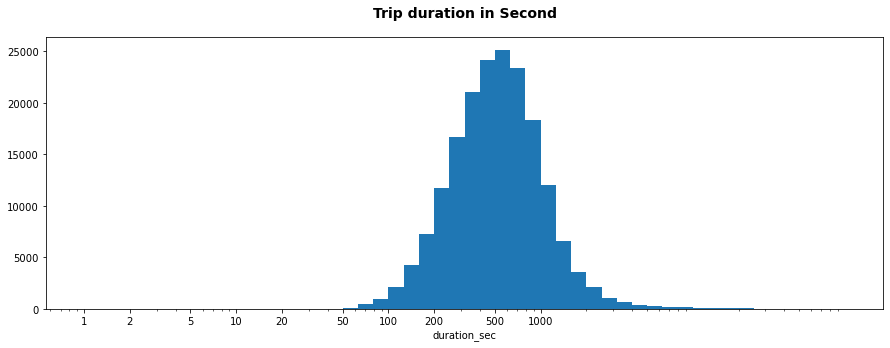

In [22]:

plt.figure(figsize=[15,5])
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_sec.max())+0.1, 0.1)
plt.title('Trip duration in Second' , y=1.05, fontsize=14, fontweight='bold')
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('duration_sec');

## When are the most trips taken interms of Day of week?

> Most trips are started and ended on Thursday

In [23]:
# color to use in plots 
base_color = sb.color_palette()[0]

# to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# to object/string
df.bike_id = df.bike_id.astype('str')

# to category
df.user_type = df.user_type.astype('category')

In [24]:
# from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

# from end_time
df['end_hour'] = df.end_time.dt.hour

# from duration_sec
df['duration_minutes'] = df['duration_sec']/60

df.insert(4, 'start_day' , df['start_time'].dt.day_name())
df.insert(6, 'end_day' , df['start_time'].dt.day_name())





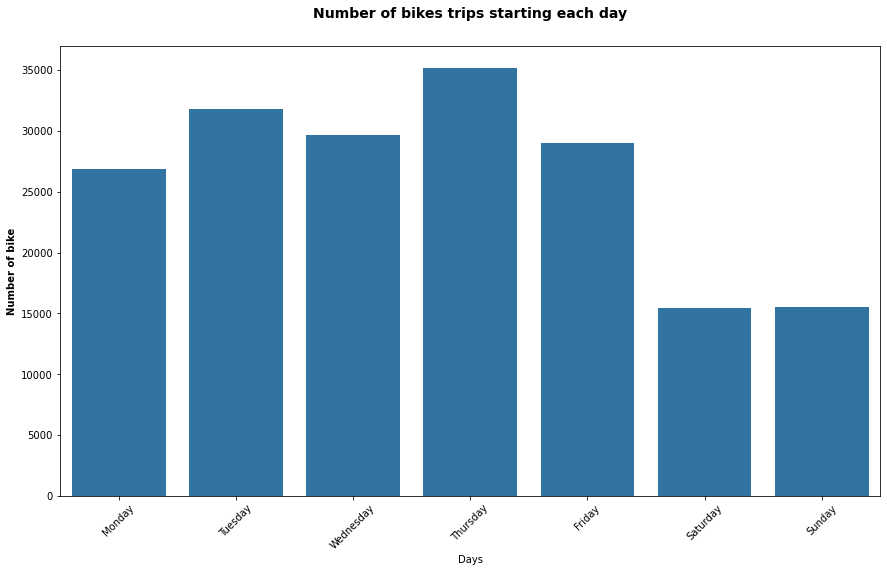

In [25]:

plt.figure(figsize=[14.70, 8.27])
startday_order = df['start_day'].value_counts().index
sb.countplot(data = df, x = 'start_day' , color = base_color, order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of bikes trips starting each day' , y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Number of bike' , fontweight='bold')
plt.xlabel('Days')
plt.xticks(rotation = 45);
plt.show()

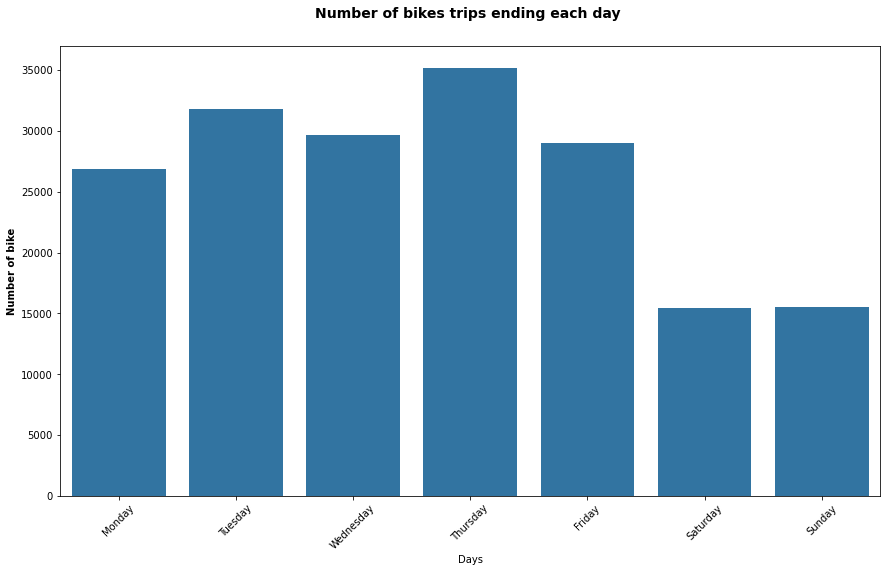

In [26]:
plt.figure(figsize=[14.70, 8.27])
startday_order = df['end_day'].value_counts().index
sb.countplot(data = df, x = 'end_day' , color = base_color ,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of bikes trips ending each day ' , y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Number of bike' , fontweight='bold')
plt.xlabel('Days')
plt.xticks(rotation = 45);

## Does the trip duration depend on the user type or not?

> all duration less than or equal to 60 min both customer and subscriber  have achived similar duration of use 

 >when we viwed by month with out setting a duration limit the plot shows approximatly both had longer trip duration



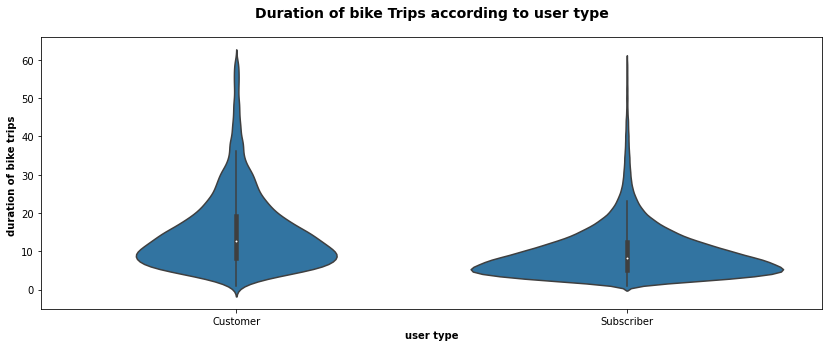

In [8]:
plt.figure(figsize=[14,5])
sb.violinplot(data = df.query("duration_minutes <= 60"),x = 'user_type' ,y='duration_minutes' ,color = sb.color_palette()[0])
plt.title('Duration of bike Trips according to user type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('user type' , fontweight='bold')
plt.ylabel('duration of bike trips ' , fontweight='bold');

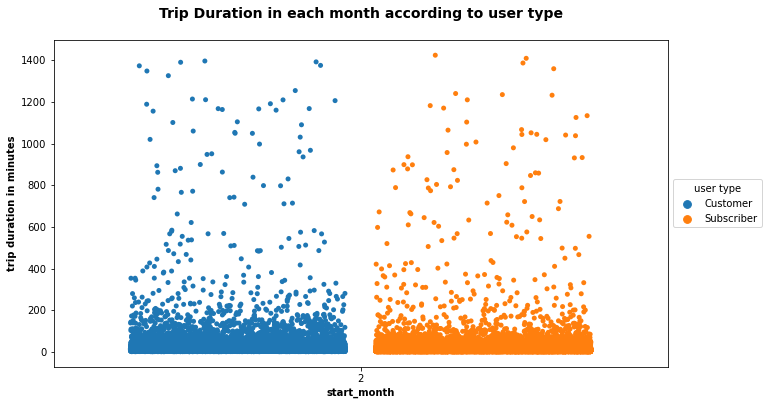

In [27]:
plt.figure(figsize=[11, 6])
sb.stripplot(data = df, x = 'start_month' , y = 'duration_minutes' , hue = 'user_type' ,
             jitter = 0.35, dodge = True )
plt.legend(loc= 'center left' , bbox_to_anchor = (1, 0.5), title = 'user type')
plt.title('Trip Duration in each month according to user type' , y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('start_month' , fontweight='bold')
plt.ylabel('trip duration in minutes'  , fontweight='bold');  

In [28]:
!jupyter nbconvert Part_2A_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_2A_slide_deck.ipynb to slides
[NbConvertApp] Writing 768420 bytes to Part_2A_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mulukal.Aneley\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mulukal.Aneley\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mulukal.Aneley\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Mulukal.Aneley\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Mulukal.Aneley\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.conver

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 